# 1.Feature Engineering for different cutoffs

Generate the village level measures (20% cutoffs, avearge, binary_safe, binary_bad, etc.) and generate village level dataset for later use

summary stats and pie plots generated as well

In [68]:
# Set up Notebook
%matplotlib inline

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings('ignore')


# Standard imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib import cm

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from scipy.stats import pearsonr

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.calibration import calibration_curve
from sklearn.metrics import average_precision_score
    
from sklearn import metrics
from sklearn.metrics import confusion_matrix,explained_variance_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import roc_curve,auc,precision_recall_curve

from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler 
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression


In [69]:
# Read from local 
mw_hh= pd.read_csv('data/clean/dataset/mw_dataset_hh.csv')
tz_hh= pd.read_csv('data/clean/dataset/tz_dataset_hh_nodup.csv')
ug_hh= pd.read_csv('data/clean/dataset/ug_dataset_hh_nodup.csv')


# Alternatively, read directly from github  

# Malawi Data
#url = 'https://raw.githubusercontent.com/zhou100/FoodSecurityPrediction/master/data/clean/dataset/mw_dataset_hh.csv'
#mw_hh = pd.read_csv(url)

# Tanzania Data 
#url_tz = 'https://raw.githubusercontent.com/zhou100/FoodSecurityPrediction/master/data/clean/dataset/tz_dataset_hh_nodup.csv'
#tz_hh = pd.read_csv(url_tz)

# Uganda Data 
#url_ug = 'https://raw.githubusercontent.com/zhou100/FoodSecurityPrediction/master/data/clean/dataset/ug_dataset_hh_nodup.csv'
#ug_hh = pd.read_csv(url_ug)



mw_hh = mw_hh.drop(['lat_modified','lon_modified','HHID'],axis=1)
tz_hh = tz_hh.drop(['yearmon','lat_modified','lon_modified'],axis=1)
ug_hh = ug_hh.drop(['lat_modified','lon_modified','HHID'],axis=1)

# check for any missing values (should return false)

print(ug_hh.isnull().values.any())
print(mw_hh.isnull().values.any())
print(tz_hh.isnull().values.any())

mw_village = mw_hh.groupby(['FS_year','ea_id']).mean()
tz_village = tz_hh.groupby(['FS_year','ea_id']).mean()
ug_village = ug_hh.groupby(['FS_year','ea_id']).mean()

# check for any missing values (should return false)
print(ug_village.isnull().values.any())
print(tz_village.isnull().values.any())
print(mw_village.isnull().values.any())


False
False
False
False
False
False


In [70]:
mw_village

FCS    HDDS    rCSI  region_north  region_central  \
FS_year ea_id                                                              
2010    10101016  42.71875  5.3750  3.6250           1.0             0.0   
        10101204  35.21875  4.9375  2.6875           1.0             0.0   
        10101215  41.84375  5.0625  2.4375           1.0             0.0   
        10101374  35.71875  4.7500  1.5625           1.0             0.0   
        10101470  39.78125  5.1250  0.6250           1.0             0.0   
...                    ...     ...     ...           ...             ...   
2017    31546870  63.50000  5.0625  5.2500           0.0             0.0   
        31548872  62.34375  4.7500  6.1875           0.0             0.0   
        31551874  75.37500  5.5000  0.0000           0.0             0.0   
        31553876  59.75000  4.8750  4.0000           0.0             0.0   
        31555878  60.03125  5.0625  5.4375           0.0             0.0   

                  rural  dist_road  dist_admarc  dist_popcenter  percent_ag  \
FS_year ea_id                                                                 
2010    10101016    1.0   2.656875    12.016250       62.406875   20.875000   
        10101204    1.0   0.513750    10.821875       58.466875   48.687500   
        10101215    1.0   9.275333     4.241333       91.712667   34.933333   
        10101374    1.0   1.185625     5.985625       88.648749   36.000000   
        10101470    1.0   0.776875    13.585000       82.332500   54.312500   
...                 ...        ...          ...             ...         ...   
2017    31546870    0.0   1.062500     2.000000       11.000000    1.125000   
        31548872    0.0   1.000000     1.625000       10.125000    0.000000   
        31551874    0.0   1.000000     4.000000        4.062500    0.000000   
        31553876    0.0   1.312500     8.687500        3.812500    3.375000   
        31555878    0.0   0.000000     2.312500        9.500000   16.937500   

                  ...  cropyear    raincytot  day1rain  maxdaysnorain  \
FS_year ea_id     ...                                                   
2010    10101016  ...    2009.0  1031.634971      38.0           97.0   
        10101204  ...    2009.0  1190.633367      38.0           95.0   
        10101215  ...    2009.0  1017.861933      37.0           99.0   
        10101374  ...    2009.0  1037.343927      37.0           93.0   
        10101470  ...    2009.0   981.030130      38.0           97.0   
...               ...       ...          ...       ...            ...   
2017    31546870  ...    2016.0   315.202517      48.0           52.0   
        31548872  ...    2016.0   315.202517      48.0           52.0   
        31551874  ...    2016.0   303.914782      48.0           55.0   
        31553876  ...    2016.0   297.951362      48.0           54.0   
        31555878  ...    2016.0   315.923125      48.0           55.0   

                  lhz_day1rain    gdd      tmean  lhz_raincytot  \
FS_year ea_id                                                     
2010    10101016          36.0  213.0  21.395283    1127.998114   
        10101204          36.0  213.0  21.395283    1127.998114   
        10101215          36.0  213.0  21.395283    1127.998114   
        10101374          36.0  213.0  21.395283    1127.998114   
        10101470          36.0  213.0  21.395283    1127.998114   
...                        ...    ...        ...            ...   
2017    31546870          48.0  213.0  28.032912     300.729923   
        31548872          48.0  213.0  28.032912     300.729923   
        31551874          48.0  213.0  28.032912     300.729923   
        31553876          48.0  193.0  28.501462     297.058074   
        31555878          48.0  193.0  28.501462     297.058074   

                  lhz_maxdaysnorain  heatdays  
FS_year ea_id                                  
2010    10101016               50.0       0.0  
        10101204               50.0     

## 2. Data Transform and training pipeline 

### 2.1. Generate different outcome variable

In [71]:
def categorize_20_bad(df, measure):
    '''
    helper function to categorize continous food measure based on binary cutoffs
    This function first classifies household level using the cutoffs 
    and then classifies whether the village has more than 20% of households in the insecure category
    '''
    
    # define cutoffs of the most food insecure category
    
    if ( measure == 'FCS'):
        labels = [1,0]
        bins= [-1,28,200]
        
    elif (measure == 'rCSI'):   
        labels = [0,1]
        bins= [-1,17,50]
        
    categorized = measure + 'binary_bad'
    
    # cut the continuous into category (household level)
    df[categorized] = pd.cut( x= df[measure], bins = bins, labels = labels)
    df[categorized] = pd.to_numeric(df[categorized])
    
    df = df[['ea_id','FS_year',categorized]]
    
    # count the number of minority and majority cases and calculate the percentage 
    df = df.groupby(['ea_id', 'FS_year',categorized])[categorized].size().unstack(fill_value=0)

    df.columns=['majority','minority']
    
    df['sum'] = df['majority'] + df['minority']
    df['portion'] = df['minority']/df['sum']
    
    # set the cutoff to be 20% of the total households in the village 
    
    binary = measure + '_20_bad'
    df[binary]= np.where(df['portion']>=0.2, 1, 0) 

    df_result= df[binary].reset_index()
    
    return df_result 

def categorize_fs_binary_safe(df, measure):
    '''
    helper function to categorize continous food measure based on binary cutoffs at the village level
    
    categorize the most food secure villages vs the rest 
    
    '''
    if ( measure == 'FCS'):
        labels = [1,0]
        bins= [-1,42,200]
        
    elif (measure == 'rCSI'):   
        labels = [0,1]
        bins= [-1,4,50]
        
    categorized = measure + '_binary_safe'
    
    df[categorized] = pd.cut( x= df[measure], bins = bins, labels = labels)
    df[categorized] = pd.to_numeric(df[categorized])

    return df 

def categorize_fs_binary_bad(df, measure):
    '''
    helper function to categorize continous food measure based on binary cutoffs at the village level
    
    categorize the most food insecure villages vs the rest 
    
    '''
    if ( measure == 'FCS'):
        labels = [1,0]
        bins= [-1,28,200]
        
    elif (measure == 'rCSI'):   
        labels = [0,1]
        bins= [-1,17,50]
        
    categorized = measure + '_binary_bad'
    
    df[categorized] = pd.cut( x= df[measure], bins = bins, labels = labels)
    df[categorized] = pd.to_numeric(df[categorized])

    
    return df 


def categorize_fs_three(df, measure):
    '''
    helper function 
    categorize continous food measure based on given cutoffs to cut into three categories 
    '''
    
    if ( measure == 'FCS'):
        labels = [2,1,0]
        bins= [-1,28,42,200]
        
    elif (measure == 'rCSI'):   
        labels = [0,1,2]
        bins= [-1,4,17,50]
        
    categorized = measure + '_3_category'
    
    df[categorized] = pd.cut( x= df[measure], bins = bins, labels = labels)
    
    df[categorized] = pd.to_numeric(df[categorized])
    
    return df 

def category_percent(df,measure):
    '''
    helper function to 
    calculate the percent of a certain food security category (three category cutoffs) in a given village  
    
    watch out for not counting the NAs    
    '''
    
    categorized = measure + '_3_category'
    
    # count each category 
    df_value_counts = df.groupby(['ea_id','FS_year'])[categorized].value_counts()
    
    # flatten to columns 
    df_value_counts_name =pd.DataFrame(df_value_counts).rename(columns={categorized: measure+'_count'}) 

    df_count = df_value_counts_name.reset_index().set_index(['ea_id','FS_year',categorized]).unstack(level=-1).fillna(0).reset_index(level=['FS_year','ea_id'])
    
    # rename columns 
    df_count['total'] = df_count[measure+'_count',0]+df_count[measure+'_count',1]+df_count[measure+'_count',2]
    df_count[(measure + '_secure_percent')]= df_count[measure+'_count',0]/df_count['total']
    df_count[(measure + '_mid_percent')]= df_count[measure+'_count',1]/df_count['total']
    df_count[(measure + '_low_percent')]= df_count[measure+'_count',2]/df_count['total']
    df_count[(measure + '_mid+low')]= df_count[measure+'_mid_percent']+df_count[measure+'_low_percent']
    
     
    df_percent = df_count[['ea_id','FS_year',(measure+'_mid+low'),(measure+'_low_percent')]]
    df_percent.columns= ['ea_id','FS_year',(measure+'_mid+low'),(measure+'_low_percent')]
    
    return df_percent

def village_percent(df_village,df_hh,measure): 
    '''
    helper function to 
    calculate and merge the percent numbers into village level dfs
    '''
    
    df_hh=categorize_fs_three(df_hh,measure=measure)
    
    df_percent = category_percent(df_hh,measure=measure)    
    
    
    df_village=categorize_fs_three(df_village,measure=measure)
    df_village=categorize_fs_binary_safe(df_village,measure=measure)
    df_village=categorize_fs_binary_bad(df_village,measure=measure)
        
    return df_percent




In [72]:
# Use the above defined functions to generate the category and percentage features 

# loop over country and measures
df_village_list = [mw_village,tz_village,ug_village]
df_hh_list = [mw_hh,tz_hh,ug_hh]
measure_list = ['FCS','rCSI']
 
for index in range(len(df_village_list)):
      
    fcs_percent = village_percent(df_village_list[index],df_hh_list[index],measure='FCS') 
    fcs_20_bad = categorize_20_bad(df_hh_list[index], 'FCS')
    df_village_list[index] = pd.merge(df_village_list[index].reset_index(),fcs_20_bad,on=['ea_id','FS_year'])
    df_village_list[index] = pd.merge(df_village_list[index],fcs_percent,on=['ea_id','FS_year'])

    # handle the Uganda case where there is no rCSI in the survey
    if index<2:
        rsci_percent = village_percent(df_village_list[index],df_hh_list[index],measure='rCSI') 
        rsci_20_bad = categorize_20_bad(df_hh_list[index], 'rCSI')
        df_village_list[index] = pd.merge(df_village_list[index].reset_index(),rsci_20_bad,on=['ea_id','FS_year'])
        df_village_list[index] = pd.merge(df_village_list[index],rsci_percent,on=['ea_id','FS_year'])
                                  

mw_village = df_village_list[0]   
tz_village = df_village_list[1] 
ug_village = df_village_list[2] 


In [73]:
mw_village.drop(columns=['index']).to_csv("data/clean/dataset/mw_village.csv",index=False)
tz_village.drop(columns=['index']).to_csv("data/clean/dataset/tz_village.csv",index=False)
ug_village.to_csv("data/clean/dataset/ug_village.csv",index=False)

### Summary stats

#### Figure 2 Pie Charts 

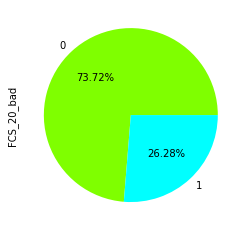

In [74]:
#### 20 % cut-off
mw_village['FCS_20_bad'].value_counts().plot(kind='pie', title='',autopct = "%.2f%%", colors = ['chartreuse', 'aqua','red'])

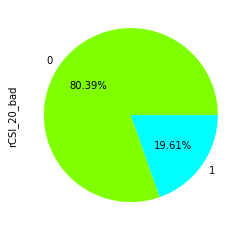

In [75]:
mw_village['rCSI_20_bad'].value_counts().plot(kind='pie', title='',autopct = "%.2f%%", colors = ['chartreuse', 'aqua','red'])

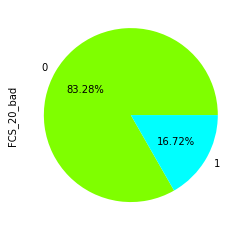

In [76]:
tz_village['FCS_20_bad'].value_counts().plot(kind='pie', title='',autopct = "%.2f%%", colors = ['chartreuse', 'aqua','red'])

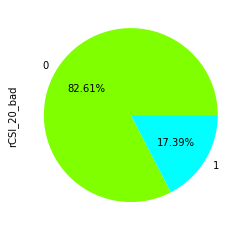

In [77]:
tz_village['rCSI_20_bad'].value_counts().plot(kind='pie', title='',autopct = "%.2f%%", colors = ['chartreuse', 'aqua','red'])

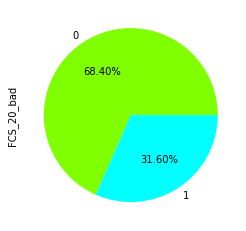

In [78]:
ug_village['FCS_20_bad'].value_counts().plot(kind='pie', title='',autopct = "%.2f%%", colors = ['chartreuse', 'aqua','red'])

#### Table 1 summary Stats by country and year

In [39]:
mw_village[(mw_village['FS_year']==2010 )| (mw_village['FS_year']==2011)].describe(exclude=object).to_csv("mw_10_summarystats.csv")

In [40]:
mw_village[(mw_village['FS_year']==2013)].describe(exclude=object).to_csv("mw_13_summarystats.csv")

In [41]:
mw_village[(mw_village['FS_year']==2016 )| (mw_village['FS_year']==2017)].describe(exclude=object).to_csv("mw_16_summarystats.csv")